In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
veriseti = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")

In [38]:
#Veri setimde kaç tane değer ve özellik olduğunu kontrol ettim
print('Verisetimde  {} değer ve {} özellik vardır'.format(veriseti.shape[0],veriseti.shape[1]))

Verisetimde  9471 değer ve 17 özellik vardır


In [39]:
#veri setinin ilk 4 satırını gösterdim
veriseti.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10.03.2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10.03.2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10.03.2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10.03.2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10.03.2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [40]:
veriseti.info() #veri setindeki niteliklerimin veri tipini gösterdim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [41]:
# veri setindeki istemediğim bilgileri kaldırdım
veriseti.drop(['Date', 'Time','NMHC(GT)'], axis=1, inplace=True)

In [42]:
#veri setinde -200'ün altında bulunan tüm değerleri eksik değer olarak kabul ediyoruz ve bu değerlerin olup olmadığını kontrol ettim. 
veriseti.isin([-200]).any()

CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
Unnamed: 15      False
Unnamed: 16      False
dtype: bool

In [43]:
#  -200'ün altındaki değerlerin tümünü NaN değerleri olarak değiştirdim
veriseti.replace(to_replace = -200, value =np.nan,inplace=True)

In [44]:
# şimdi veri setinde kaç tane boş değer olduğunu gösterdim
veriseti.isnull().sum()

CO(GT)           1797
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [45]:
# boş değerleri 0 ile doldurdum
veriseti.fillna(0,inplace=True)
veriseti.sample(10)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
7991,1.4,944.0,3.7,693.0,217.0,928.0,150.0,832.0,568.0,9.2,29.9,0.3479,0.0,0.0
8035,1.5,1047.0,6.9,854.0,238.0,753.0,158.0,959.0,904.0,12.7,27.4,0.4011,0.0,0.0
3530,0.0,999.0,7.2,867.0,0.0,785.0,0.0,1644.0,864.0,27.2,46.0,1.6376,0.0,0.0
7030,0.0,1252.0,15.5,1164.0,0.0,559.0,0.0,1474.0,1257.0,13.6,52.8,0.8177,0.0,0.0
4022,3.5,1314.0,21.0,1325.0,204.0,499.0,106.0,2143.0,1390.0,26.4,50.8,1.7166,0.0,0.0
3640,1.4,1044.0,9.8,970.0,54.0,715.0,39.0,1751.0,1068.0,31.8,38.9,1.8005,0.0,0.0
1354,0.0,758.0,1.2,517.0,15.0,1625.0,22.0,1294.0,351.0,13.1,67.1,1.0079,0.0,0.0
1798,1.4,926.0,7.7,885.0,114.0,1101.0,92.0,1259.0,662.0,25.5,14.0,0.4495,0.0,0.0
1115,0.4,809.0,1.2,521.0,35.0,1575.0,44.0,1158.0,378.0,13.9,43.9,0.6923,0.0,0.0
5828,1.8,919.0,10.0,978.0,246.0,820.0,105.0,1180.0,805.0,13.1,38.5,0.5776,0.0,0.0


In [46]:
veriseti.describe() #veri kümesinin istatistiksel değerlerinin tablosunu gösterdim.

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.0,9471.0
mean,1.744293,1044.092493,9.572083,891.556119,201.198290,793.149931,92.123218,1382.459614,971.064196,17.389463,46.738961,0.973555,0.0,0.0
std,1.556833,320.842290,7.588069,331.708152,214.846208,310.162114,61.948970,464.571956,448.428826,9.497258,20.032784,0.453217,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.900000,0.000000,0.000000,0.0,0.0
25%,0.600000,915.000000,3.900000,704.000000,47.000000,631.000000,51.000000,1171.000000,689.000000,10.700000,33.500000,0.676800,0.0,0.0
50%,1.500000,1050.000000,7.800000,890.000000,139.000000,791.000000,95.000000,1440.000000,936.000000,17.000000,48.100000,0.971100,0.0,0.0
75%,2.600000,1218.000000,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500,0.0,0.0
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,0.0,0.0


# Keşifsel Veri Analizi (EDA)

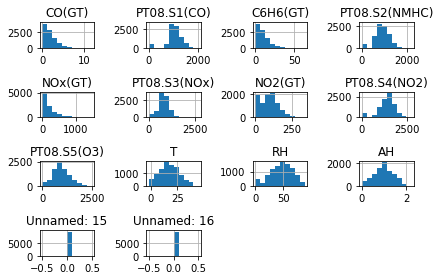

In [47]:
#her özelliğin histogram grafiğini gösterdim.
veriseti.hist()
plt.tight_layout()
plt.show();

<AxesSubplot:>

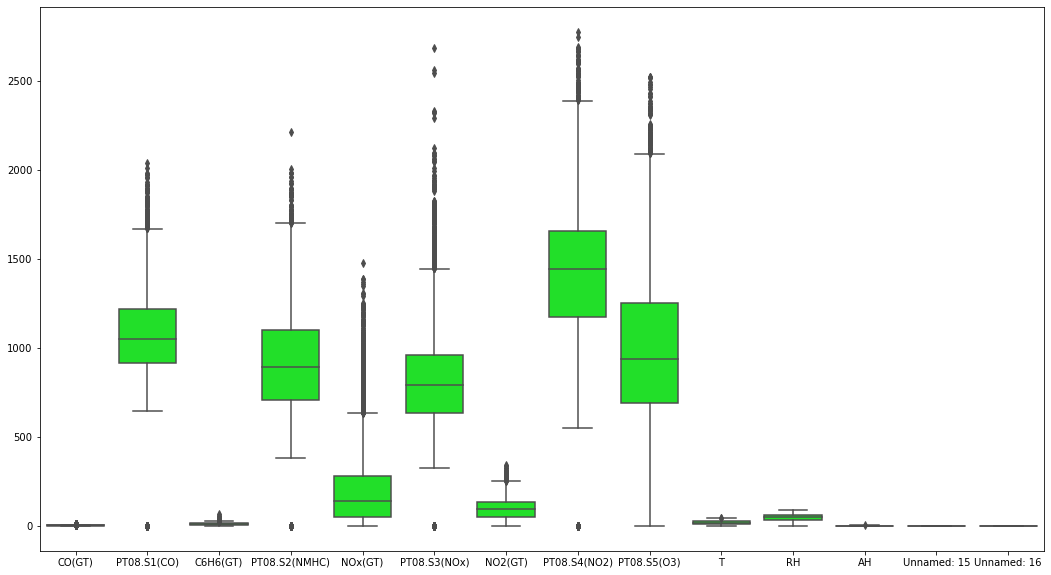

In [48]:
# aykırı değerlerin görselleştirilmesi
plt.figure(figsize=(18,10))
sns.boxplot(data=veriseti,color='#02FF0C')

In [49]:
# aykırı değerleri IQR (Inter Quertile Range) ile doldurdum.
Q1 = veriseti.quantile(0.25)
Q3 = veriseti.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CO(GT)             2.0000
PT08.S1(CO)      303.0000
C6H6(GT)           9.6000
PT08.S2(NMHC)    398.0000
NOx(GT)          234.5000
PT08.S3(NOx)     326.0000
NO2(GT)           81.0000
PT08.S4(NO2)     487.0000
PT08.S5(O3)      561.0000
T                 13.3000
RH                28.2000
AH                 0.6147
Unnamed: 15        0.0000
Unnamed: 16        0.0000
dtype: float64


In [50]:
veriseti = veriseti[~((veriseti < (Q1-1.5*IQR)) | (veriseti > (Q3+1.5*IQR))).any(axis=1)]
veriseti.sample(10)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
7020,0.0,885.0,1.8,572.0,0.0,1081.0,0.0,1031.0,612.0,10.4,64.8,0.8138,0.0,0.0
7803,1.5,920.0,2.9,649.0,196.0,983.0,140.0,849.0,598.0,3.1,47.4,0.3661,0.0,0.0
8890,0.6,938.0,1.7,559.0,147.0,942.0,97.0,1026.0,850.0,9.0,65.4,0.7532,0.0,0.0
283,2.0,1102.0,10.4,994.0,107.0,955.0,87.0,1599.0,783.0,21.3,28.1,0.7067,0.0,0.0
513,0.9,956.0,4.0,713.0,0.0,1099.0,0.0,1422.0,849.0,9.0,73.1,0.8394,0.0,0.0
5709,2.5,1214.0,12.9,1080.0,323.0,611.0,87.0,1642.0,1190.0,26.3,43.7,1.4718,0.0,0.0
6451,3.1,1224.0,11.9,1046.0,580.0,630.0,124.0,1476.0,1213.0,11.8,86.5,1.1981,0.0,0.0
5778,3.3,1391.0,17.1,1214.0,490.0,518.0,112.0,1691.0,1435.0,20.4,57.0,1.3507,0.0,0.0
4231,0.0,1004.0,8.5,921.0,0.0,699.0,0.0,1495.0,1092.0,24.9,47.9,1.4855,0.0,0.0
5503,1.6,989.0,8.0,900.0,231.0,737.0,60.0,1401.0,968.0,16.8,74.9,1.4258,0.0,0.0


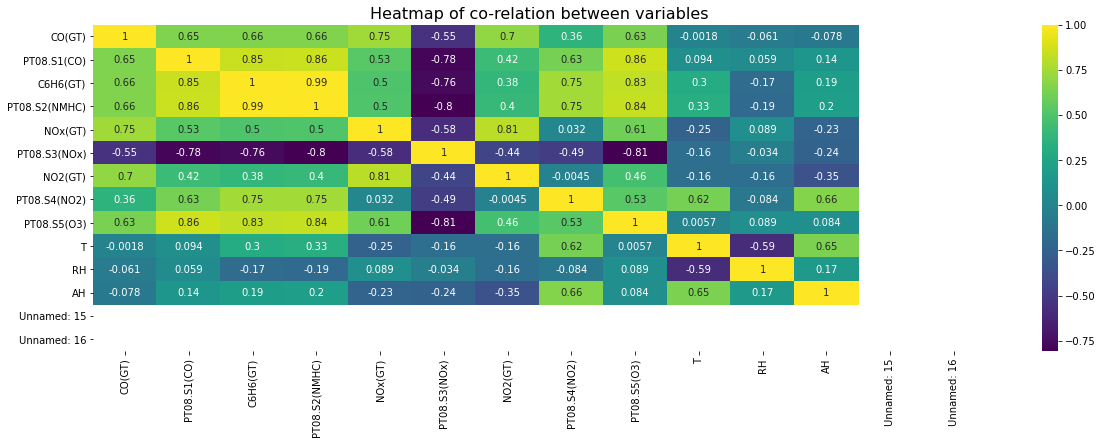

In [51]:
#tüm nitelikler arasındaki ilişkinin ısı haritasında gösterimi
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(veriseti.corr(),annot=True,cmap='viridis',ax=ax)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show();

By seeing these correlation we conclude that Target variable : C6H6(GT) is highly correlated to PTO8.S2(NMHC), so we take PTO8.S2(NMHC) as independent parameter to predict the dependent parameter i.e, C6H6(GT)

In [52]:
X = veriseti[['PT08.S2(NMHC)']] # bağımsız parametreyi X olarak aldım
y = veriseti['C6H6(GT)'] # bağımlı parametreyi y olarak aldım

Here we splitted the train and test data, we giving 10 samples for training and 90 samples for testing this is very quite
interesting to do because weonly have 10 sample out of 100 for training and 90 samples for testing, Let see how the model going
to predict

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9)

In [54]:
print( X_train.shape, X_test.shape)

(811, 1) (7308, 1)


In [55]:
print('eğitim setindeki satır sutun:', X_train.shape)
print('test setindeki satır sutun:', X_test.shape)

eğitim setindeki satır sutun: (811, 1)
test setindeki satır sutun: (7308, 1)


# 1. Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predict = lm.predict(X_test)

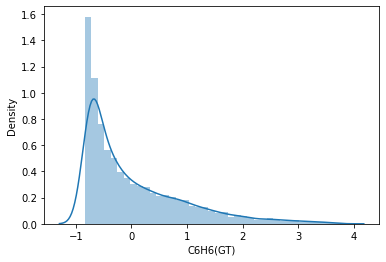

In [57]:
sns.distplot(y_test-lm_predict);

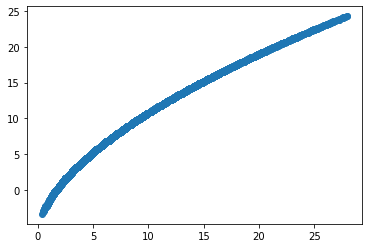

In [58]:
plt.scatter(y_test,lm_predict);

In [59]:
from sklearn import metrics
lmstat = [round(metrics.mean_squared_error(y_test,lm_predict),4), round(np.sqrt(metrics.mean_squared_error(y_test,lm_predict)),4),round(metrics.r2_score(y_test,lm_predict)*100,4)]
print('MSE value for LinearRegression model is {}'.format(lmstat[0]))
print('RMSE value for LinearRegression model is {}'.format(lmstat[1]))
print('R^2 value for LinearRegression model is {}'.format(lmstat[2]))

MSE value for LinearRegression model is 0.8044
RMSE value for LinearRegression model is 0.8969
R^2 value for LinearRegression model is 97.6225


# 2. Lasso Regression Model

In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-0.8526303842374613


In [72]:
lasso_predict = lasso_regressor.predict(X_test)

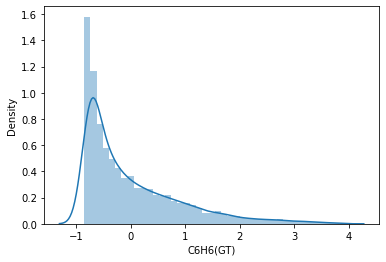

In [75]:
sns.distplot(y_test-lasso_predict);

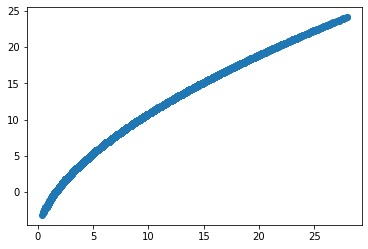

In [76]:
plt.scatter(y_test,lasso_predict);

In [64]:
lassostat = [round(metrics.mean_squared_error(y_test,lasso_predict),4), round(np.sqrt(metrics.mean_squared_error(y_test,lasso_predict)),4),round(metrics.r2_score(y_test,lasso_predict)*100,4)]
print('MSE value for LassoRegression model is {}'.format(lassostat[0]))
print('RMSE value for LassoRegression model is {}'.format(lassostat[1]))
print('R^2 value for LassoRegression model is {}'.format(lassostat[2]))

MSE value for LassoRegression model is 0.8019
RMSE value for LassoRegression model is 0.8955
R^2 value for LassoRegression model is 97.6299


# 3. Karar ağacı modeli

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)
dt_predict=dtree.predict(X_test)

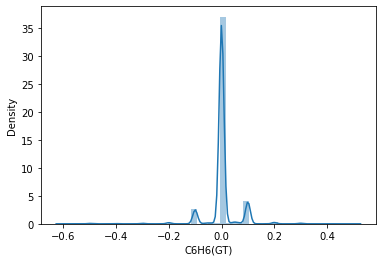

In [77]:
sns.distplot(y_test-dt_predict);

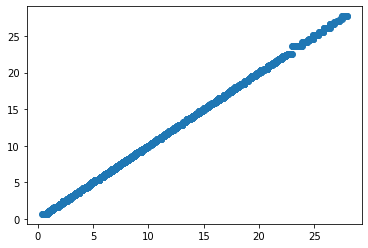

In [81]:
plt.scatter(y_test,dt_predict);

In [79]:
dtstat = [round(metrics.mean_squared_error(y_test,dt_predict),4), round(np.sqrt(metrics.mean_squared_error(y_test,dt_predict)),4),round(metrics.r2_score(y_test,dt_predict)*100,4)]
print('MSE value for Decision Tree Regression model is {}'.format(dtstat[0]))
print('RMSE value for Decision Tree Regression model is {}'.format(dtstat[1]))
print('R^2 value for Decision Tree Regression model is {}'.format(dtstat[2]))

MSE value for Decision Tree Regression model is 0.0029
RMSE value for Decision Tree Regression model is 0.0543
R^2 value for Decision Tree Regression model is 99.9913


In [80]:
conclusion = pd.DataFrame(data=[lmstat,lassostat,dtstat],
                          index=['Doğrusal regresyon','Kement regresyon','Karar ağacı modeli'],
                         columns = ['MSE','RMSE','R^2'])

In [70]:
conclusion

,MSE,RMSE,R^2
Doğrusal regresyon,0.8044,0.8969,97.6225
Kement regresyon,0.8019,0.8955,97.6299
Karar ağacı modeli,0.0029,0.0543,99.9913
